In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

### First we import the datasets

In [3]:
df1 = pd.read_csv('X_values.csv')
df1.head()

,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
0,0_0,0,0,-0.75853,-0.63435,-0.10488,-0.10597,0.107650,0.017561,0.000767,-0.74857,2.1030,-9.7532
1,0_1,0,1,-0.75853,-0.63434,-0.10490,-0.10600,0.067851,0.029939,0.003386,0.33995,1.5064,-9.4128
2,0_2,0,2,-0.75853,-0.63435,-0.10492,-0.10597,0.007275,0.028934,-0.005978,-0.26429,1.5922,-8.7267
3,0_3,0,3,-0.75852,-0.63436,-0.10495,-0.10597,-0.013053,0.019448,-0.008974,0.42684,1.0993,-10.0960
4,0_4,0,4,-0.75852,-0.63435,-0.10495,-0.10596,0.005135,0.007652,0.005245,-0.50969,1.4689,-10.4410


In [4]:
df2 = pd.read_csv('y_values.csv')
df2.head()

,series_id,group_id,surface
0,0,13,fine_concrete
1,1,31,concrete
2,2,20,concrete
3,3,31,concrete
4,4,22,soft_tiles


### We will combine them into one dataframe to perform initial pre-processing

In [5]:
df = pd.merge(df1, df2, on='series_id', how='inner')
df.head()

,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z,group_id,surface
0,0_0,0,0,-0.75853,-0.63435,-0.10488,-0.10597,0.107650,0.017561,0.000767,-0.74857,2.1030,-9.7532,13,fine_concrete
1,0_1,0,1,-0.75853,-0.63434,-0.10490,-0.10600,0.067851,0.029939,0.003386,0.33995,1.5064,-9.4128,13,fine_concrete
2,0_2,0,2,-0.75853,-0.63435,-0.10492,-0.10597,0.007275,0.028934,-0.005978,-0.26429,1.5922,-8.7267,13,fine_concrete
3,0_3,0,3,-0.75852,-0.63436,-0.10495,-0.10597,-0.013053,0.019448,-0.008974,0.42684,1.0993,-10.0960,13,fine_concrete
4,0_4,0,4,-0.75852,-0.63435,-0.10495,-0.10596,0.005135,0.007652,0.005245,-0.50969,1.4689,-10.4410,13,fine_concrete


In [6]:
df.shape 

(487680, 15)

In [7]:
# To see basic information abuot the dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487680 entries, 0 to 487679
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   row_id                 487680 non-null  object 
 1   series_id              487680 non-null  int64  
 2   measurement_number     487680 non-null  int64  
 3   orientation_X          487680 non-null  float64
 4   orientation_Y          487680 non-null  float64
 5   orientation_Z          487680 non-null  float64
 6   orientation_W          487680 non-null  float64
 7   angular_velocity_X     487680 non-null  float64
 8   angular_velocity_Y     487680 non-null  float64
 9   angular_velocity_Z     487680 non-null  float64
 10  linear_acceleration_X  487680 non-null  float64
 11  linear_acceleration_Y  487680 non-null  float64
 12  linear_acceleration_Z  487680 non-null  float64
 13  group_id               487680 non-null  int64  
 14  surface                487680 non-nu

### Now we will perform label class encoding to set each surface as a number in the following order : 

In [8]:
df["surface_label"] = df["surface"].map({'fine_concrete':0, 'concrete':1, 'soft_tiles':2, 'tiled':3, 'soft_pvc':4, 'hard_tiles_large_space':5, 'carpet':6, 'hard_tiles':7, 'wood':8})

In [9]:
df['surface'].unique()

array(['fine_concrete', 'concrete', 'soft_tiles', 'tiled', 'soft_pvc',
       'hard_tiles_large_space', 'carpet', 'hard_tiles', 'wood'],
      dtype=object)

### There are 9 surface types that are part of this dataset

### Lets now perform some basic EDA on this dataset

In [10]:
df['surface'].value_counts()    # to check number of data points for each surface

surface
concrete                  99712
soft_pvc                  93696
wood                      77696
tiled                     65792
fine_concrete             46464
hard_tiles_large_space    39424
soft_tiles                38016
carpet                    24192
hard_tiles                 2688
Name: count, dtype: int64

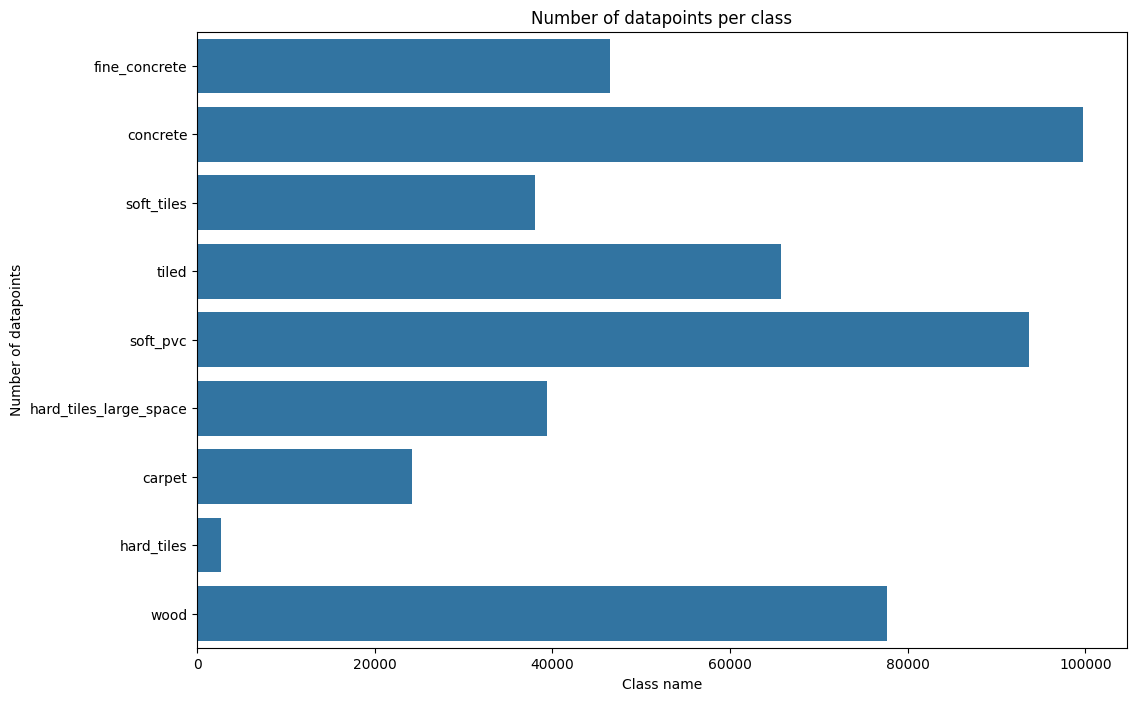

In [11]:
# Lets plot this 
plt.figure(figsize = (12, 8))
sns.countplot(df["surface"])
plt.title("Number of datapoints per class")
plt.ylabel("Number of datapoints")
plt.xlabel("Class name")
plt.show()

In [12]:
print(sum(df.duplicated()))

0


### There are no duplicated or null values

### Lets start looking at the box plots for orientation, angular velocity and linear acceleration 

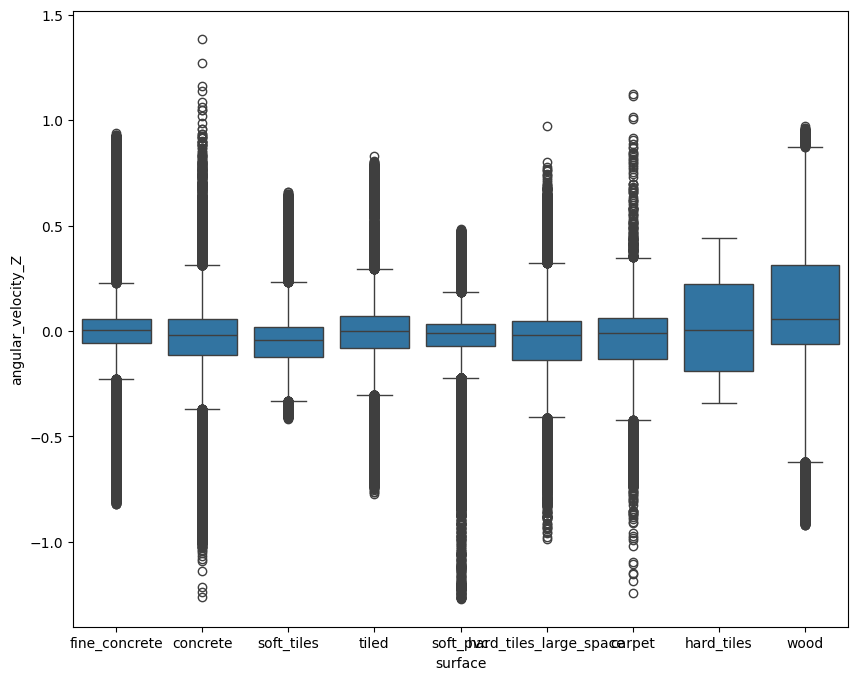

In [13]:
plt.figure(figsize = (10, 8))
sns.boxplot(x = df["surface"], y = df["angular_velocity_Z"], data = df)
plt.show()

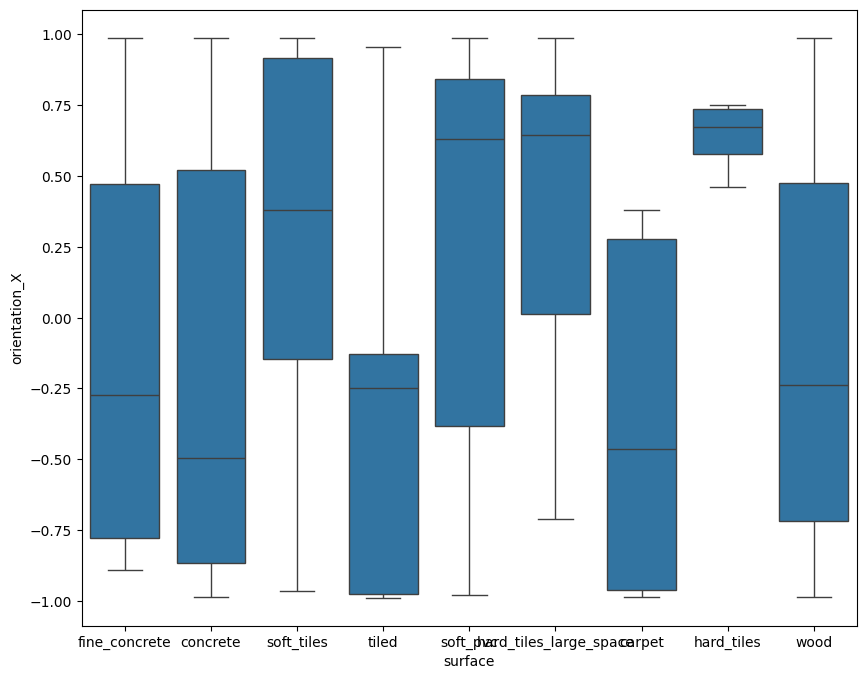

In [14]:
plt.figure(figsize = (10, 8))
sns.boxplot(x = df["surface"], y = df["orientation_X"], data = df)
plt.show()

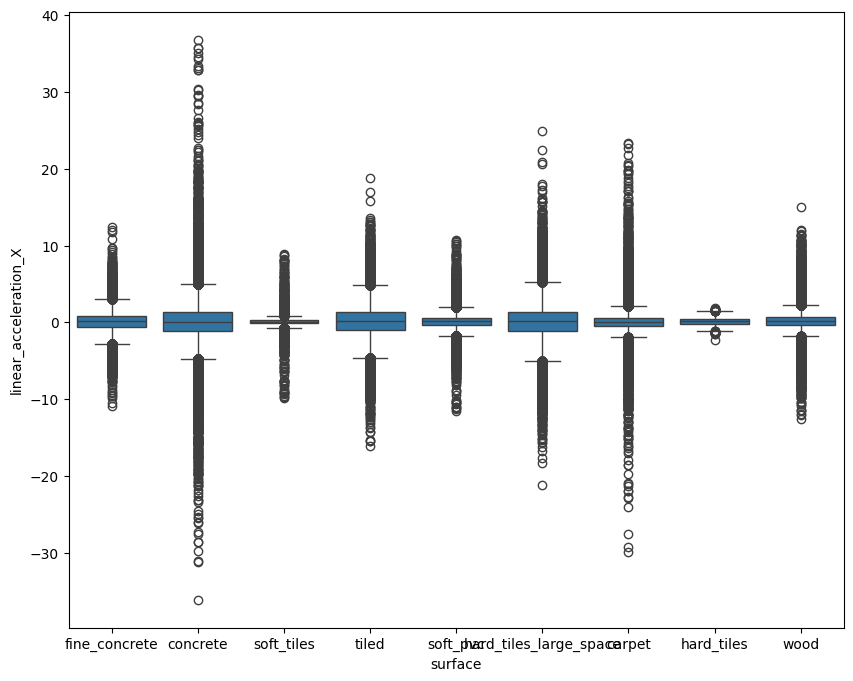

In [15]:
plt.figure(figsize = (10, 8))
sns.boxplot(x = df["surface"], y = df["linear_acceleration_X"], data = df)
plt.show()

#### We shall now perform feature engineering by using simple features by taking min, max, mean, median and var for the variables.

In [16]:
df_d = df.drop(['row_id', 'measurement_number','surface','group_id'], axis=1)
df_f = df_d.groupby('series_id').agg(['min', 'max', 'mean', 'median', 'var'])
df_f.head(100)

orientation_X                                              \
                    min       max      mean    median           var   
series_id                                                             
0              -0.75953 -0.758220 -0.758666 -0.758530  1.315506e-07   
1              -0.95896 -0.958370 -0.958606 -0.958595  2.290667e-08   
2              -0.51434 -0.509440 -0.512057 -0.512035  1.897428e-06   
3              -0.93968 -0.938840 -0.939169 -0.939170  5.167628e-08   
4              -0.89689 -0.886730 -0.891301 -0.890940  8.733900e-06   
...                 ...       ...       ...       ...           ...   
95             -0.91184 -0.896970 -0.904313 -0.904335  1.907237e-05   
96             -0.96043 -0.958680 -0.959641 -0.959530  2.167966e-07   
97             -0.39108 -0.387560 -0.389224 -0.389070  8.823868e-07   
98              0.01224  0.013186  0.012913  0.012996  5.097172e-08   
99              0.43396  0.448190  0.440802  0.440575  1.692213e-05   

          orientation_Y                                             ...  \
                    min      max      mean    median           var  ...   
series_id                                                           ...   
0              -0.63456 -0.63306 -0.634008 -0.634270  2.219834e-07  ...   
1               0.24074  0.24270  0.241867  0.241890  2.487725e-07  ...   
2              -0.84779 -0.84490 -0.846171 -0.846210  6.163613e-07  ...   
3               0.30943  0.31147  0.310140  0.310115  2.052456e-07  ...   
4               0.41646  0.43740  0.428144  0.428865  3.801147e-05  ...   
...                 ...      ...       ...       ...           ...  ...   
95              0.38277  0.41629  0.399978  0.400105  9.790715e-05  ...   
96              0.23532  0.24125  0.238498  0.238285  2.692564e-06  ...   
97              0.90797  0.90964  0.908769  0.908740  1.658835e-07  ...   
98             -0.98904 -0.98897 -0.989009 -0.989030  7.672183e-10  ...   
99             -0.88878 -0.88187 -0.885703 -0.885665  4.177897e-06  ...   

          linear_acceleration_Z                                         \
                            min      max      mean   median        var   
series_id                                                                
0                      -12.5120 -6.26810 -9.320391 -9.42995   1.199113   
1                      -16.9280 -2.74490 -9.388899 -9.41380   4.507406   
2                      -12.4990 -5.74420 -9.395783 -9.37440   1.300208   
3                      -19.8450 -0.55910 -9.451164 -9.16170  12.100171   
4                      -10.9750 -7.44900 -9.349988 -9.33280   0.660295   
...                         ...      ...       ...      ...        ...   
95                     -11.5420 -7.59470 -9.316160 -9.30030   0.663314   
96                     -26.2000  3.81760 -9.295242 -9.10675  31.675904   
97                     -20.5230  0.50902 -9.316794 -9.42955  12.107284   
98                      -9.6417 -9.29010 -9.440540 -9.42265   0.006658   
99                     -12.9570 -4.05940 -9.271006 -9.34245   3.685299   

          surface_label                       
                    min max mean median  var  
series_id                                     
0                     0   0  0.0    0.0  0.0  
1                     1   1  1.0    1.0  0.0  
2                     1   1  1.0    1.0  0.0  
3                     1   1  1.0    1.0  0.0  
4                     2   2  2.0    2.0  0.0  
...                 ...  ..  ...    ...  ...  
95                    2   2  2.0    2.0  0.0  
96                    8   8  8.0    8.0  0.0  
97                    8   8  8.0    8.0  0.0  
98                    5   5  5.0    5.0  0.0  
99                    3   3  3.0    3.0  0.0  

[100 rows x 55 columns]

In [17]:
df_f.to_csv('dataset.csv',index=False,header=True)
data = pd.read_csv('dataset.csv')
data['surface_label'] = df['surface_label']
data.head()

,orientation_X,orientation_X.1,orientation_X.2,orientation_X.3,orientation_X.4,orientation_Y,orientation_Y.1,orientation_Y.2,orientation_Y.3,orientation_Y.4,...,linear_acceleration_Z,linear_acceleration_Z.1,linear_acceleration_Z.2,linear_acceleration_Z.3,linear_acceleration_Z.4,surface_label,surface_label.1,surface_label.2,surface_label.3,surface_label.4
0,min,max,mean,median,var,min,max,mean,median,var,...,min,max,mean,median,var,0,max,mean,median,var
1,-0.75953,-0.75822,-0.75866578125,-0.75853,1.3155056594485545e-07,-0.63456,-0.63306,-0.63400765625,-0.63427,2.2198343996058477e-07,...,-12.512,-6.2681,-9.320390625,-9.429950000000002,1.199112837706693,0,0,0.0,0.0,0.0
2,-0.95896,-0.95837,-0.95860640625,-0.9585950000000001,2.2906668307093186e-08,0.24074,0.2427,0.241866953125,0.24189,2.487725332185084e-07,...,-16.928,-2.7449,-9.38889921875,-9.4138,4.507405880550564,0,1,1.0,1.0,0.0
3,-0.51434,-0.50944,-0.51205734375,-0.512035,1.8974275344488783e-06,-0.84779,-0.8449,-0.8461709375,-0.84621,6.163613188975763e-07,...,-12.499,-5.7442,-9.3957828125,-9.374400000000001,1.3002078609621066,0,1,1.0,1.0,0.0
4,-0.93968,-0.93884,-0.9391690625,-0.93917,5.167627952754291e-08,0.30943,0.31147,0.31014015625,0.31011500000000003,2.0524564468508132e-07,...,-19.845,-0.5591,-9.4511640625,-9.1617,12.100170985942423,0,1,1.0,1.0,0.0


### Now we split this into x (input features) and y (target variable - surface label)

In [18]:
x = data.iloc[1: ,0:50]
x.head()

,orientation_X,orientation_X.1,orientation_X.2,orientation_X.3,orientation_X.4,orientation_Y,orientation_Y.1,orientation_Y.2,orientation_Y.3,orientation_Y.4,...,linear_acceleration_Y,linear_acceleration_Y.1,linear_acceleration_Y.2,linear_acceleration_Y.3,linear_acceleration_Y.4,linear_acceleration_Z,linear_acceleration_Z.1,linear_acceleration_Z.2,linear_acceleration_Z.3,linear_acceleration_Z.4
1,-0.75953,-0.75822,-0.75866578125,-0.75853,1.3155056594485545e-07,-0.63456,-0.63306,-0.63400765625,-0.63427,2.2198343996058477e-07,...,0.075417,5.3864,2.9841948984375,3.40755,1.925961852583132,-12.512,-6.2681,-9.320390625,-9.429950000000002,1.199112837706693
2,-0.95896,-0.95837,-0.95860640625,-0.9585950000000001,2.2906668307093186e-08,0.24074,0.2427,0.241866953125,0.24189,2.487725332185084e-07,...,-2.1492,6.685,2.76819294140625,2.7500999999999998,3.476199352833321,-16.928,-2.7449,-9.38889921875,-9.4138,4.507405880550564
3,-0.51434,-0.50944,-0.51205734375,-0.512035,1.8974275344488783e-06,-0.84779,-0.8449,-0.8461709375,-0.84621,6.163613188975763e-07,...,-1.254,6.2105,2.8867445703125,3.03375,3.132163202429885,-12.499,-5.7442,-9.3957828125,-9.374400000000001,1.3002078609621066
4,-0.93968,-0.93884,-0.9391690625,-0.93917,5.167627952754291e-08,0.30943,0.31147,0.31014015625,0.31011500000000003,2.0524564468508132e-07,...,-5.8251,11.743,2.65792232734375,3.00885,17.651849196423495,-19.845,-0.5591,-9.4511640625,-9.1617,12.100170985942423
5,-0.89689,-0.88673,-0.891300546875,-0.89094,8.73389969857246e-06,0.41646,0.4374,0.42814421874999997,0.428865,3.801147025098354e-05,...,0.34207,4.8181,2.981497890625,3.13565,1.2945338426970896,-10.975,-7.449,-9.34998828125,-9.332799999999999,0.6602948008852109


In [19]:
y = data['surface_label']
y = y.iloc[1: ,]
y.head()

1    0
2    0
3    0
4    0
5    0
Name: surface_label, dtype: int64

### Lets start working on the ML model

In [20]:
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTEENN


# Lets first scale the data by oversampling it as they are way more of one of the classes than the other

sm = SMOTEENN()
x_rs, y_rs = sm.fit_resample(x,y)
x_train, x_test, y_train, y_test = train_test_split(x_rs,y_rs,test_size=0.3)

#### Lets first try decision tree classifier

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

dtc = DecisionTreeClassifier(max_depth=15, random_state= 149)
dtc.fit(x_train,y_train)
y_pred = dtc.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.64      0.64       152
           1       0.44      0.56      0.49        25
           2       0.37      0.39      0.38        18
           3       0.00      0.00      0.00         2
           4       0.65      0.68      0.67       165
           5       0.69      0.59      0.64       131
           6       0.48      0.52      0.50        66
           7       0.81      0.80      0.81       227

    accuracy                           0.67       786
   macro avg       0.51      0.52      0.51       786
weighted avg       0.67      0.67      0.67       786



c:\Users\d0emv\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\d0emv\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\d0emv\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

#### Testing with K nearest neighbours

In [22]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       152
           1       0.78      0.84      0.81        25
           2       0.69      0.50      0.58        18
           3       0.00      0.00      0.00         2
           4       0.91      0.93      0.92       165
           5       0.89      0.77      0.83       131
           6       0.80      0.73      0.76        66
           7       0.90      0.96      0.93       227

    accuracy                           0.88       786
   macro avg       0.73      0.71      0.71       786
weighted avg       0.87      0.88      0.87       786



c:\Users\d0emv\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\d0emv\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\d0emv\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

### We can very clearly see here that KNN is giving a way better result than decision tree classifiers
#### Trying with different number of neighbours, 3 seems to be giving the highest accuracy

In [23]:
# Now lets check with some ensemble techniques

from sklearn.ensemble import RandomForestClassifier, VotingClassifier
rfc = RandomForestClassifier(max_depth=17, random_state=97, n_estimators=301)
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88       152
           1       1.00      0.68      0.81        25
           2       1.00      0.33      0.50        18
           3       0.00      0.00      0.00         2
           4       0.79      0.95      0.87       165
           5       0.92      0.66      0.77       131
           6       0.79      0.64      0.71        66
           7       0.80      0.99      0.89       227

    accuracy                           0.84       786
   macro avg       0.78      0.64      0.68       786
weighted avg       0.85      0.84      0.83       786



c:\Users\d0emv\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\d0emv\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\d0emv\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

#### after trying multiple different depths and random states, this is the highest accuracy attained using this model

#### KNN still seems to be doing better than the random forest classifier so lets try with some boosting techniques

In [24]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(max_depth=13, random_state=42)
gbc.fit(x_train,y_train)
y_pred=gbc.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.84      0.80       152
           1       0.61      0.68      0.64        25
           2       0.50      0.28      0.36        18
           3       0.00      0.00      0.00         2
           4       0.77      0.84      0.80       165
           5       0.95      0.66      0.78       131
           6       0.78      0.61      0.68        66
           7       0.81      0.93      0.87       227

    accuracy                           0.79       786
   macro avg       0.65      0.60      0.62       786
weighted avg       0.80      0.79      0.79       786



In [25]:
from catboost import CatBoostClassifier
cbc = CatBoostClassifier(learning_rate= 0.1)
cbc.fit(x_train,y_train)
y_pred=cbc.predict(x_test)
print(classification_report(y_test,y_pred))

0:	learn: 1.9892310	total: 194ms	remaining: 3m 13s
1:	learn: 1.9101922	total: 227ms	remaining: 1m 53s
2:	learn: 1.8507642	total: 253ms	remaining: 1m 24s
3:	learn: 1.7926888	total: 279ms	remaining: 1m 9s
4:	learn: 1.7496510	total: 303ms	remaining: 1m
5:	learn: 1.7134978	total: 327ms	remaining: 54.1s
6:	learn: 1.6766318	total: 351ms	remaining: 49.7s
7:	learn: 1.6431378	total: 373ms	remaining: 46.2s
8:	learn: 1.6136426	total: 396ms	remaining: 43.6s
9:	learn: 1.5831632	total: 418ms	remaining: 41.4s
10:	learn: 1.5514048	total: 441ms	remaining: 39.6s
11:	learn: 1.5272892	total: 464ms	remaining: 38.2s
12:	learn: 1.5038152	total: 486ms	remaining: 36.9s
13:	learn: 1.4841817	total: 508ms	remaining: 35.8s
14:	learn: 1.4625354	total: 530ms	remaining: 34.8s
15:	learn: 1.4466235	total: 553ms	remaining: 34s
16:	learn: 1.4270174	total: 575ms	remaining: 33.3s
17:	learn: 1.4090110	total: 598ms	remaining: 32.6s
18:	learn: 1.3906904	total: 620ms	remaining: 32s
19:	learn: 1.3710734	total: 643ms	remaining: 

c:\Users\d0emv\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\d0emv\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\d0emv\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

### We're getting the best results using KNN with 3 neighbours and Catboost with a learning rate of 0.1
#### Lets see if we can increase the accuracy of the model by using a voting classifier for KNN and Catboost

In [26]:
vc = VotingClassifier([('clf1',knn),('clf2',cbc)],voting='soft')
vc.fit(x_train,y_train)
y_pred = vc.predict(x_test)
print(classification_report(y_test,y_pred))

0:	learn: 1.9892310	total: 24.4ms	remaining: 24.3s
1:	learn: 1.9101922	total: 43.6ms	remaining: 21.8s
2:	learn: 1.8507642	total: 61.9ms	remaining: 20.6s
3:	learn: 1.7926888	total: 80.6ms	remaining: 20.1s
4:	learn: 1.7496510	total: 99.6ms	remaining: 19.8s
5:	learn: 1.7134978	total: 118ms	remaining: 19.6s
6:	learn: 1.6766318	total: 137ms	remaining: 19.4s
7:	learn: 1.6431378	total: 155ms	remaining: 19.3s
8:	learn: 1.6136426	total: 174ms	remaining: 19.2s
9:	learn: 1.5831632	total: 194ms	remaining: 19.2s
10:	learn: 1.5514048	total: 214ms	remaining: 19.3s
11:	learn: 1.5272892	total: 233ms	remaining: 19.2s
12:	learn: 1.5038152	total: 252ms	remaining: 19.1s
13:	learn: 1.4841817	total: 271ms	remaining: 19.1s
14:	learn: 1.4625354	total: 289ms	remaining: 19s
15:	learn: 1.4466235	total: 308ms	remaining: 18.9s
16:	learn: 1.4270174	total: 326ms	remaining: 18.9s
17:	learn: 1.4090110	total: 345ms	remaining: 18.8s
18:	learn: 1.3906904	total: 364ms	remaining: 18.8s
19:	learn: 1.3710734	total: 382ms	rema

c:\Users\d0emv\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\d0emv\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\d0emv\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

## We are indeed able to achieve the highest accuracy by using a soft voting classifer that consists of KNN and Catboost !

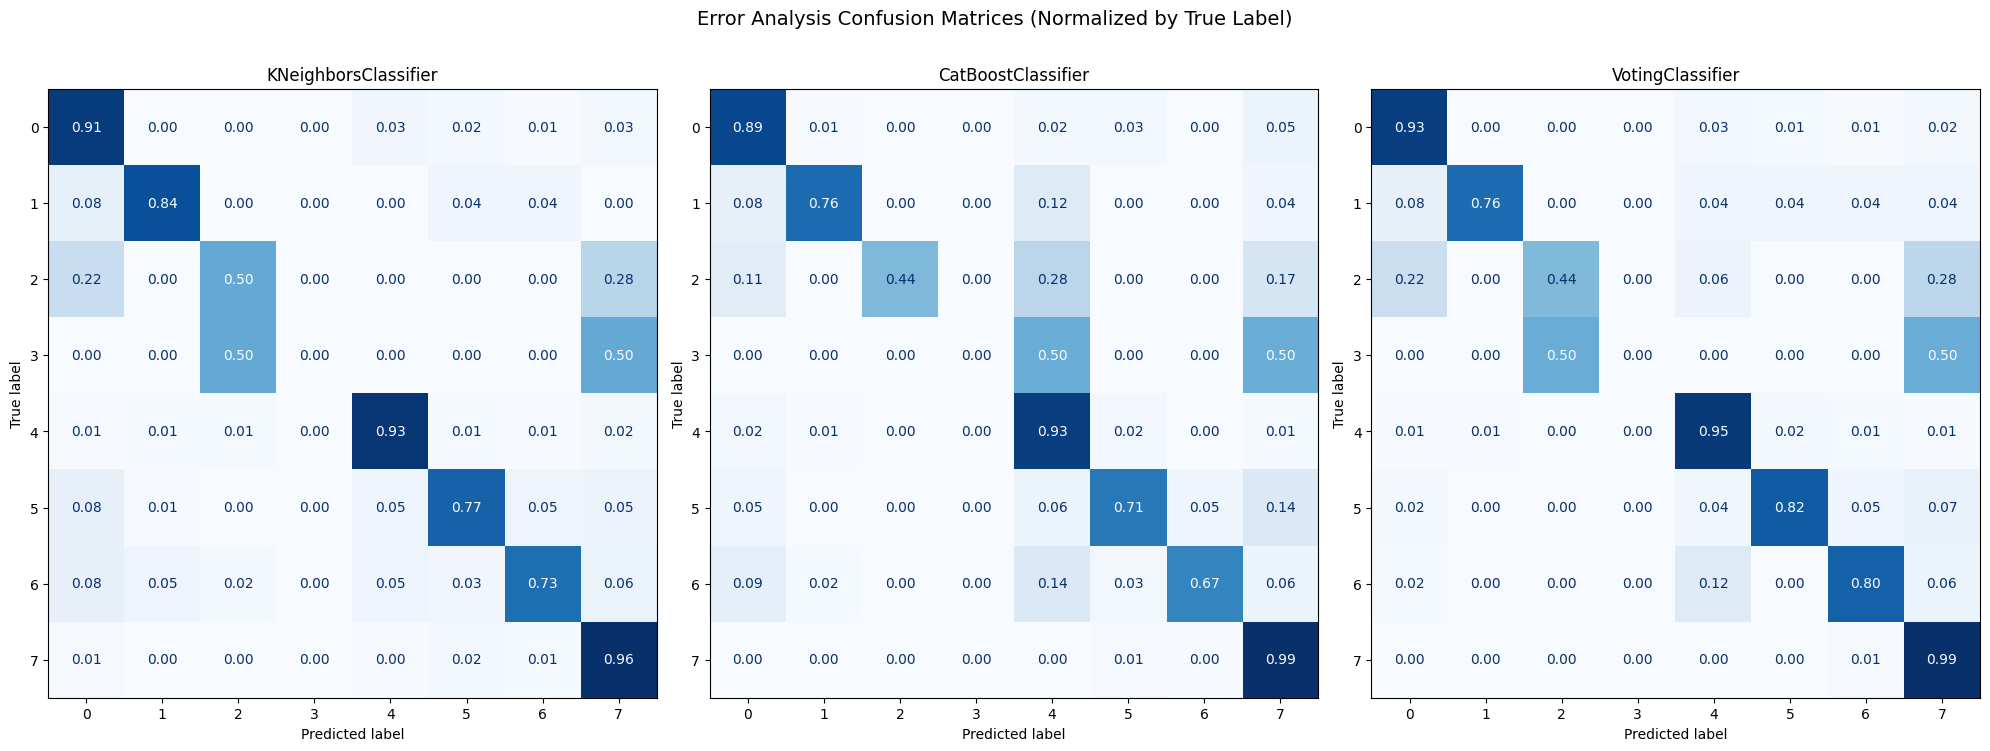

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score 

def ErrorAnalysis(models, num):
    fig, ax = plt.subplots(1, num, figsize=(20, 8))  
    for model in models:
        y_pred = model.predict(x_test)
        # Changed normalize='true' to show per-class accuracy (row-wise normalization)
        m = confusion_matrix(y_test, y_pred, normalize='true')
        disp = ConfusionMatrixDisplay(confusion_matrix=m, display_labels=model.classes_)
        disp.plot(ax=ax[models.index(model)], cmap=plt.cm.Blues, values_format='.2f', colorbar=False)
        ax[models.index(model)].set_title(type(model).__name__)

    plt.tight_layout()
    fig.suptitle('Error Analysis Confusion Matrices (Normalized by True Label)', fontsize=14)
    plt.show()

ErrorAnalysis([knn, cbc, vc], 3)

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import numpy as np
import matplotlib.pyplot as plt

def ErrorAnalysis(models, num, x_test=x_test, y_test=y_test):
    fig, axes = plt.subplots(1, num, figsize=(22, 7))

    # If only one model, axes will not be a list
    if num == 1:
        axes = [axes]

    for i, model in enumerate(models):
        y_pred = model.predict(x_test)

        # Row-normalized confusion matrix (per-class accuracy)
        cm = confusion_matrix(y_test, y_pred, normalize='true')
        cm_counts = confusion_matrix(y_test, y_pred)

        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
        disp.plot(ax=axes[i], cmap='Blues', values_format=".2f", colorbar=False)

        # Overall accuracy
        acc = accuracy_score(y_test, y_pred)

        # Prepare text for per-class accuracy and support
        per_class_acc = np.diag(cm)
        support = np.sum(cm_counts, axis=1)

        text = "Class-wise Recall (Accuracy):\n"
        for cls, r, s in zip(model.classes_, per_class_acc, support):
            text += f"Class {cls}: {r:.2f} (support={s})\n"

        axes[i].set_title(f"{type(model).__name__}\nAccuracy = {acc:.2f}", fontsize=12)

        # Add text box to the right side of each plot
        axes[i].text(1.15, 0.5, text, transform=axes[i].transAxes,
                     fontsize=9, va='center', bbox=dict(boxstyle="round", fc="white"))

    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    fig.suptitle("Error Analysis – Confusion Matrices (Per-Class Accuracy)", fontsize=16)
    plt.show()
